# CPE695 HW5 
**By: Tyler Bryk**

In this assignment, we will design a genetic algorithm to perform polynomial fitting on a randomly generated dataset. The genetic algorithm will create new offspring by using both mutation and crossover operations. First, the sample data will be created which follows the curve Y = x^3 + 20x^2 + 5x + Noise. Then the genetic algorithm will be implemented, and the results will be compared with the built-in polyfit() function. 

In [1]:
# Import Libraries
import math
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
plt.style.use('seaborn-whitegrid')

In [2]:
# Define Simulated Data from HW1
noise = 100 
samples = 50
x = 25 * (np.random.rand(samples, 1) - 0.8)
y = 5 * x + 20 * x**2 + 1 * x**3 + noise * np.random.randn(samples, 1) 
x_train, x_test, y_train, y_test = train_test_split(x.squeeze(), y.squeeze(), test_size=0.30, random_state=10413641)

In [3]:
# Helper Functions
def generateChromos(n):
  chromosomes = []
  for i in range(n):
    chromosomes.append(np.random.randint(0,25,4))
  return chromosomes

def MSE(chromosomes):
  error = []
  for chr in chromosomes:
      poly = np.poly1d(chr)
      preds = []
      for x in x_train:
        preds.append(poly(x))
      error.append(np.square(y_train - preds).mean())
  return error

def findKMin(data, k):
  bestData = sorted(data)[:k]
  bestIdx  = []
  for d in bestData:
    bestIdx.append(data.index(d))
  return bestIdx

In [4]:
def polyFitGA(iter=500, mutationRate=0.1, crossoverRate=1):
  chromosomes = generateChromos(100)
  for i in range(iter):
    # Compute Error of Chromosomes
    error = MSE(chromosomes)

    # Keep 10 Best Chromosomes
    keptChromos = []
    bestIdxs = findKMin(data=error, k=10)
    for idx in bestIdxs:
      keptChromos.append(chromosomes[idx])

    # Generate New Chromosomes
    chromosomes = []
    for chrIdx in range(0,len(keptChromos),2):
      chr1 = keptChromos[chrIdx]
      chr2 = keptChromos[chrIdx+1]
      chromosomes.append(chr1)
      chromosomes.append(chr2)
      while len(chromosomes) < (20*((chrIdx/2)+1)):
        #Crossover
        if (np.random.uniform(0.0, 1.0) <= crossoverRate):
          randIdx = np.random.randint(0,3)
          newChromo = []
          for i1 in range(randIdx+1):
            newChromo.append(chr1[i1])
          for i2 in range(randIdx+1, len(chr2)):
            newChromo.append(chr2[i2])
          chromosomes.append(np.array(newChromo))
          
        # Mutation
        if (np.random.uniform(0.0, 1.0) <= mutationRate):
          randIdx = np.random.randint(0,4)
          randMlt = np.random.uniform(0.0, 2.0)
          if np.random.randint(0,10) < 5: tmp = chr1.copy()
          else: tmp = chr2.copy()
          tmp[randIdx] = tmp[randIdx] * randMlt
          chromosomes.append(tmp)

  # Pick Best Chromosome
  error = MSE(chromosomes)
  bestIdx = findKMin(data=error, k=1)
  return chromosomes[bestIdx[0]]

In [5]:
# Train Both GA() and Polyfit() Models
polyPF = np.poly1d(np.polyfit(x_train, y_train, 3))
polyGA = np.poly1d(polyFitGA(iter=500, mutationRate=0.10, crossoverRate=1.00))

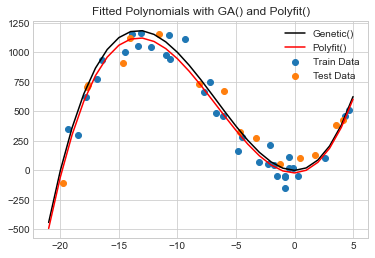

In [6]:
# Plot Fitted Polynomials with GA() and Polyfit()
xfitPF, xfitGA, yfitPF, yfitGA = [],[],[],[]
for i in range(math.floor(min(x_train))-1, math.ceil(max(x_train))+1):
  xfitPF.append(i)
  yfitPF.append(polyPF(i))
  xfitGA.append(i)
  yfitGA.append(polyGA(i))

plt.title('Fitted Polynomials with GA() and Polyfit()')
plt.plot(xfitGA, yfitGA, 'k')
plt.plot(xfitPF, yfitPF, 'r')
plt.scatter(x_train, y_train)
plt.scatter(x_test, y_test)
plt.legend(['Genetic()', 'Polyfit()', 'Train Data', 'Test Data'])
plt.show()

In [7]:
# Show Testing Error for GA() & Polyfit()
predsGA, predsPF = [],[]
for x in x_test:
  predsGA.append(polyGA(x))
  predsPF.append(polyPF(x))
errorGA = np.square(y_test - predsGA).mean()/100
errorPF = np.square(y_test - predsPF).mean()/100
print(f"Total Error of Genetic Algorithm: {int(errorGA)}")
print(f"Total Error of Polyfit Function:  {int(errorPF)}")

Total Error of Genetic Algorithm: 109
Total Error of Polyfit Function:  106


As shown in the results above, the error of the genetic algorithm is very close to that of the polyfit() function. We can also empirically visualize this based on the graph displayed above. The ideal parameters for the GA were mutation rate = 0.01 and crossover rate = 1.00. Overall, both models did a very good job of fitting polynomials to the raw sample data.